# Introduction

Predicting client behavior is critical in the competitive banking industry. One significant issue is predicting which clients will sign up for a term deposit, a key indicator that determines a bank's financial viability. To address this, I, Data Scientist Patrick Chaccour, will investigate a variety of predictive algorithms, like Random Forests & Tsetlin Machine. the goal to find the best accurate model and to get insights into the underlying elements that influence consumer decisions.

# Pipeline Agenda:
1. Importing Libraries
2. Dataset cleaning and exploratory analysis
3. Data Preprocessing
4. Implementing the Tsetlin Machine Model

> Binarizing

> Training the TM Model

> Prediction & Results

5. Implementing Random Forest, Logistic Regression, and Gradient Boosting.
6. Tsetlin Machine VS Random Forest
7. Interpretation of the Tsetlin Machine Model
8. Conclusion

# **Importing Libraries**

In [3]:
## Step 1 -- Data Cleaning & Exploratory Analysis
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Step 3 -- Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Step 4 -- Tsetlin Machine Implementation

In [4]:
pip install PyTsetlinMachine

  Preparing metadata (setup.py) ... done
  Created wheel for PyTsetlinMachine: filename=pyTsetlinMachine-0.6.4-cp310-cp310-linux_x86_64.whl size=58746 sha256=5e1950bd5c6cf059501cf180f0e3cb8e0fe7584089121ec47a17aa42afa15a86
  Stored in directory: /root/.cache/pip/wheels/fb/a5/27/75f4c86a17c6bcb7c209a0923794840c2885e1e768523cec90
Successfully built PyTsetlinMachine


In [5]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tools import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Step 5 -- 5. Implementing Random Forest, Logistic Regression, and Gradient Boosting.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# **Data Cleaning & Exploratory Analysis**

In [7]:
# Load the dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df.duplicated(keep='first').sum()

0

The dataset is clean. There are no missing values nor outliers.

#### *Features documentation:*
The data appears to be associated with a banking marketing campaign.

Quick rundown of the features:
- Age
- Job: Type of job
- Martial: 'married,''single,' or 'divorced'
- Education: Level of education
- Default: Indication of client's default credit
- Balance: Yearly balance
- Housing: Indication of housing loan
- Loan: Indication of personal loan
- Contact:Type of communication
- Day: Last interaction in days
- Month: Last interaction in months
- Duration: Last interaction in seconds
- Campaign: Number of contacts made for this client
- Pdays: last interaction by previous campain
- Preious: Amount of contacts prior to this campain
- Poutcome: Past marketing campaign outcome
- Deposit: - - TARGET VARIABLE - - indication of client's term deposit

In [11]:
len(df['deposit'].unique())

2

The target variable, deposit, is binary, indicating whether the client subscribed (yes) or did not subscribe (no) to a term deposit.


#### **Visualizing the distribution of the target variable & other features in the dataset**

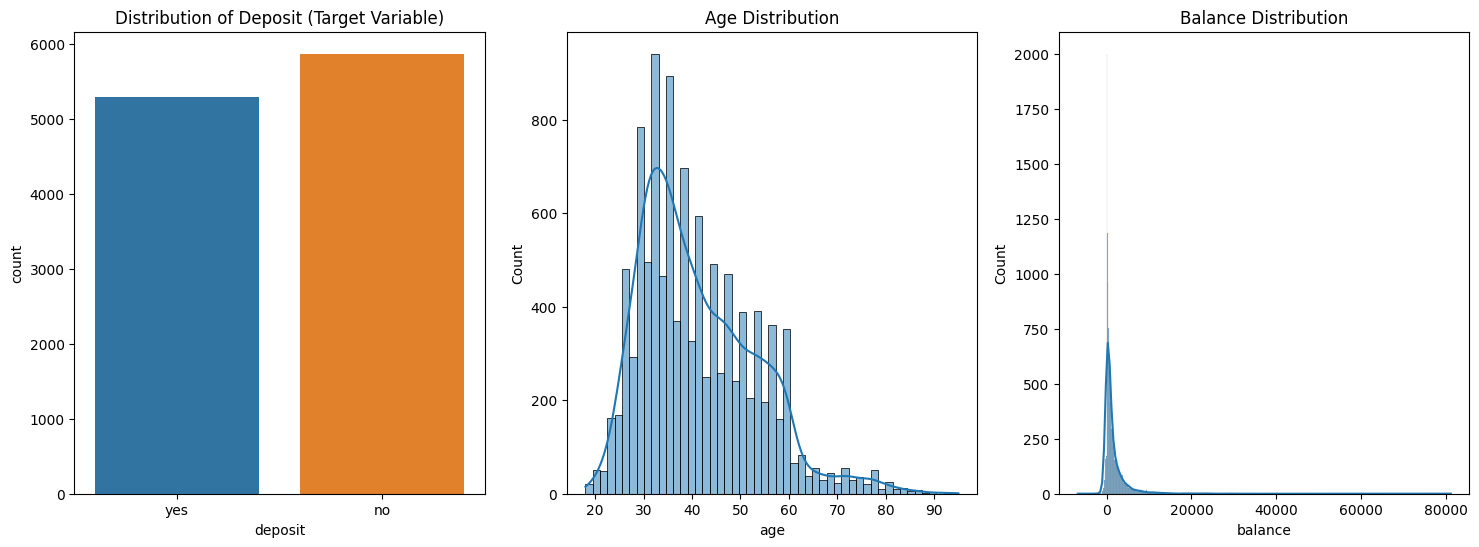

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='deposit', ax=ax[0])
ax[0].set_title('Distribution of Deposit (Target Variable)')

sns.histplot(data=df, x='age', kde=True, ax=ax[1])
ax[1].set_title('Age Distribution')

sns.histplot(data=df, x='balance', kde=True, ax=ax[2])
ax[2].set_title('Balance Distribution')

plt.show()


#### *Basic Statistics:*
- Deposit: target variable. Clients who did not subscribe to a term deposit outnumbered those who did.However the distribution is well balanced
- Age: Clients age ranged from 18 to 95, with an average of around 40. The majority are 20 to 60 years old
- Balance: The average annualbalance is around 1500, with a range of -7000 to 80000. Most people have between 2k and 5k euros..


### *Data Preperation Steps:*

> Missing values were investigated: There were no missing values discovered.

> Basic statistical analysis was carried out to comprehend data distribution.

# **Data Preprocessing**

#### **Encoding the Dataset**

In [13]:
le = LabelEncoder()
df['deposit'] = le.fit_transform(df['deposit'])

df_ecd = pd.get_dummies(df, drop_first=True)

#### **Splitting the Dataset**

In [14]:
X = df_ecd.drop('deposit', axis=1)
y = df_ecd['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape[0], " instances")
print("Testing set:", X_test.shape[0], " instances")

Training set: 8929  instances
Testing set: 2233  instances


#**Tsetlin Machine Model Implementation**

### **Binarizing**

In [15]:
# Using the median to binarize the data
X_train_binarized = (X_train > X_train.median()).astype(int).values
X_test_binarized = (X_test > X_train.median()).astype(int).values

### **Training the Tsetlin Machine Model**

In [16]:
tm = MultiClassTsetlinMachine(number_of_clauses=100, T=15, s=3.9)

tm.fit(X_train_binarized, y_train.values, epochs=30)


### **Predictiction & Results**

In [17]:
prediction = tm.predict(X_test_binarized)

tmac_score = accuracy_score(y_test, prediction)
tmpc_score = precision_score(y_test, prediction)
tmrc_score = recall_score(y_test, prediction)
tmf1_score = f1_score(y_test, prediction)

print("Based on the metrics provided, the Tsetlin Machine performed the following on the test set:")
print("Accuracy:", (tmac_score)*100, "%")
print("Precision:", (tmpc_score)*100, "%")
print("Recall:", (tmrc_score)*100, "%")
print("F1-Score:", (tmf1_score)*100, "%")


Based on the metrics provided, the Tsetlin Machine performed the following on the test set:
Accuracy: 77.33990147783251 %
Precision: 74.93333333333332 %
Recall: 79.00656044985942 %
F1-Score: 76.91605839416059 %


# **Model Comparison**

*Implementing other models (Random Forest, Logistic Regression, Gradient Boosting)*

In [18]:
def prediction (model):
  pred = model.predict(X_test)
  accuracy_model = accuracy_score(y_test, pred)
  precision_model = precision_score(y_test, pred)
  recall_model = recall_score(y_test, pred)
  f1_model_val = f1_score(y_test, pred)

  return accuracy_model, precision_model, recall_model, f1_model_val

### *Random Forest*

In [19]:
randforst = RandomForestClassifier(random_state=42)

randforst.fit(X_train, y_train)

prediction(randforst)

(0.8410210479175997,
 0.8144876325088339,
 0.8641049671977507,
 0.8385629831741701)

### *Logistic Regression*

In [20]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, y_train)

prediction(logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8087774294670846,
 0.8143418467583498,
 0.7769447047797563,
 0.7952038369304556)

### *Gradient Boosting Classifier*

In [21]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train, y_train)

prediction(gbc)

(0.8311688311688312,
 0.8159340659340659,
 0.8350515463917526,
 0.8253821213524781)

In [22]:
rf_result = prediction(randforst)
lr_result = prediction(logreg)
gbc_result = prediction(gbc)

data = {
    'Model': ['TM', 'Random Forest', 'Logistic Regression', 'Gradient Boosting Classifier'],
    'Accuracy Score': [tmac_score, rf_result[0], lr_result[0], gbc_result[0]],
    'Precision Score': [tmpc_score, rf_result[1], lr_result[1], gbc_result[1]],
    'Recall Score': [tmrc_score, rf_result[2], lr_result[2], gbc_result[2]],
    'F1-Score': [tmf1_score, rf_result[3], lr_result[3], gbc_result[3]]
}

df_scores = pd.DataFrame(data)

df_scores.head()


,Model,Accuracy Score,Precision Score,Recall Score,F1-Score
0,TM,0.773399,0.749333,0.790066,0.769161
1,Random Forest,0.841021,0.814488,0.864105,0.838563
2,Logistic Regression,0.808777,0.814342,0.776945,0.795204
3,Gradient Boosting Classifier,0.831169,0.815934,0.835052,0.825382


#### **Visual comparison of the performance metrics for the Tsetlin Machine and the conventional models**

<Axes: xlabel='Accuracy Score', ylabel='Model'>

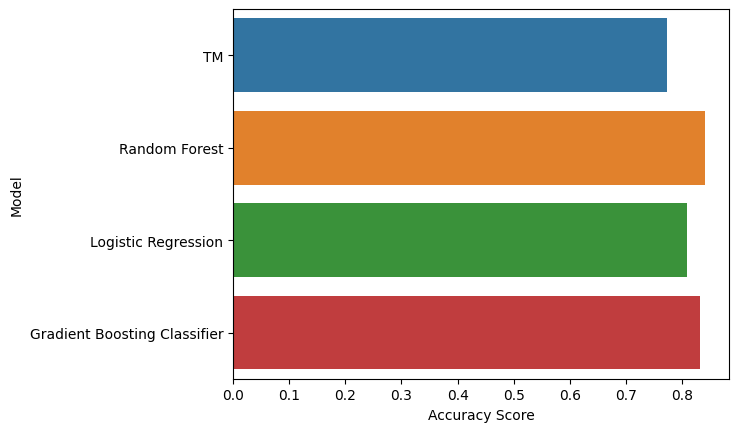

In [23]:
sns.barplot(data=df_scores, y='Model', x='Accuracy Score')

<Axes: xlabel='Precision Score', ylabel='Model'>

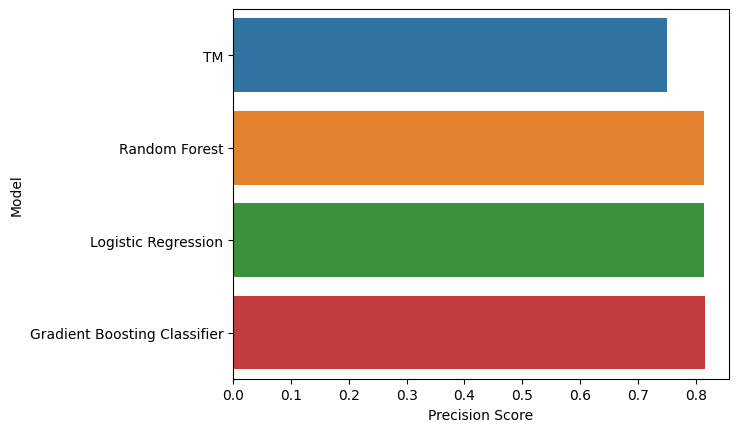

In [24]:
sns.barplot(data=df_scores, y='Model', x='Precision Score')

<Axes: xlabel='Recall Score', ylabel='Model'>

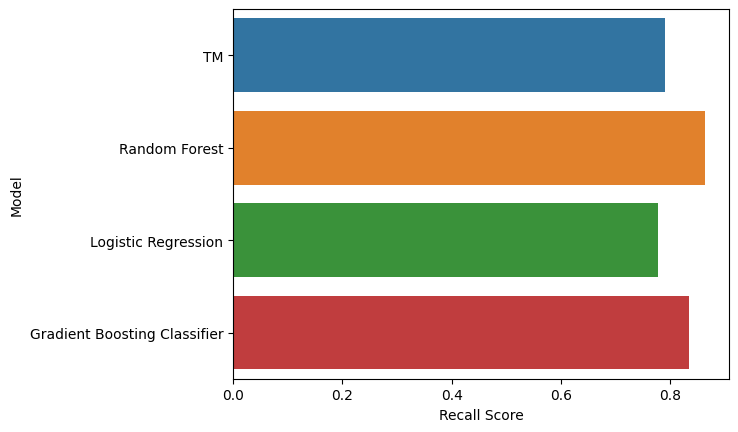

In [25]:
sns.barplot(data=df_scores, y='Model', x='Recall Score')

<Axes: xlabel='F1-Score', ylabel='Model'>

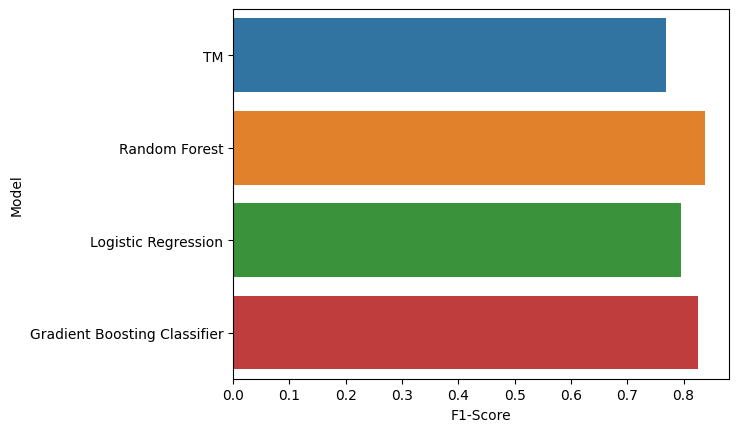

In [26]:
sns.barplot(data=df_scores, y='Model', x='F1-Score')

> Accuracy

Random Forest and Gradient Boosting have the best accuracy, Logistic Regression has the lowest accuracy.

> Precision

Logistic Regression's precision is a tad higher than the other models

> Recall

Random Forest has the best recall, Logistic Regression has the lowest one.

> F1-Score:

Random Forest and Gradient Boosting have the best F1 score, Logistic Regression has the lowest score.


# **Random Forest VS Tsetlin Machine**

*Tsetlin Machine (TM):*
- TM operates based on simple rules, making it easier to interpret.
- TM is typically faster to train than deep learning models, but it may be slower than some classic machine learning methods.
- TM attained an accuracy score of 77%
- TM are relatively new, but have as many tools as RF.

*Random Forest (RF):*
- Random Forest is an ensemble of decision trees. While individual decision trees are easily understood, the heavier the dataset the more challenging it becomes
- Training time can vary depending on the amount of trees(data). Howeverm it can train pretty quickly in general.
- RF had the best accuracy falling at 84%
- Quite popular in the industry.

In conclusion the Random Forest Model is not only more accurate overall, but it also achieves a superior balance of precision and recall, as evidenced by its higher F1-score.

# **Interpretation of the Tsetlin Machine Model**

In [29]:
df_scores.iloc[0]

Model                    TM
Accuracy Score     0.773399
Precision Score    0.749333
Recall Score       0.790066
F1-Score           0.769161
Name: 0, dtype: object

#### **Metrics**:

- Accuracy: 77%

This means that for about 77% of the test data, the TM model correctly anticipated whether a client would subscribe to a term deposit or not.

- Precision: 75%

The precision result suggests that about 75% of all situations where the TM model predicted 'yes' were correct.

- Recall: 79%

The TM model successfully detected roughly 79% of all actual instances where customers actually registered to a term deposit

- F1-Score: 77%

An F1-score of 77% means that the TM model has an excellent balance of precision and recall.


#### **Interpretation**:
With an accuracy of 77%, the Tsetlin Machine Model is reasonably good at predicting the outcome based on the features provided. Its strength appears to be in reccall, which means it is good at capturing the majority of pleasant experiences. It does, however, compromise some precision, meaning that there may be more false positives.

However, in all criteria, the Random Forest model surpasses the Tsetlin Machine model.

#### **Evidence**:
- The Random Forest model's better accuracy demonstrates its improved ability to make right predictions.
- The RF's model's higher precision suggests fewer false positives.
- Because the Random Forest model has a greater recall, it misses fewer true 'yes' results.
- The Random Forest model's higher F1-score implies a better overall balance of precision and recall, making it a more robust model for this dataset.

All in all, while the Tsetlin Machine does pretty well on this dataset, the Random Forest model outperforms it in predicting whether a client would subscribe to a term deposit or not.


# Conclusion

Both the Tsetlin Machine and the Random Forest have advantages and disadvantages. While the Random Forest surpassed the TM in terms of accuracy on this dataset, the TM's rule-based approach provides higher interpretability. The option should take into account both performance and task-specific requirements, such as interpretability or training duration.

KAGGLE DATASET LINK:

https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

### ***SUBMISSION FORM:***

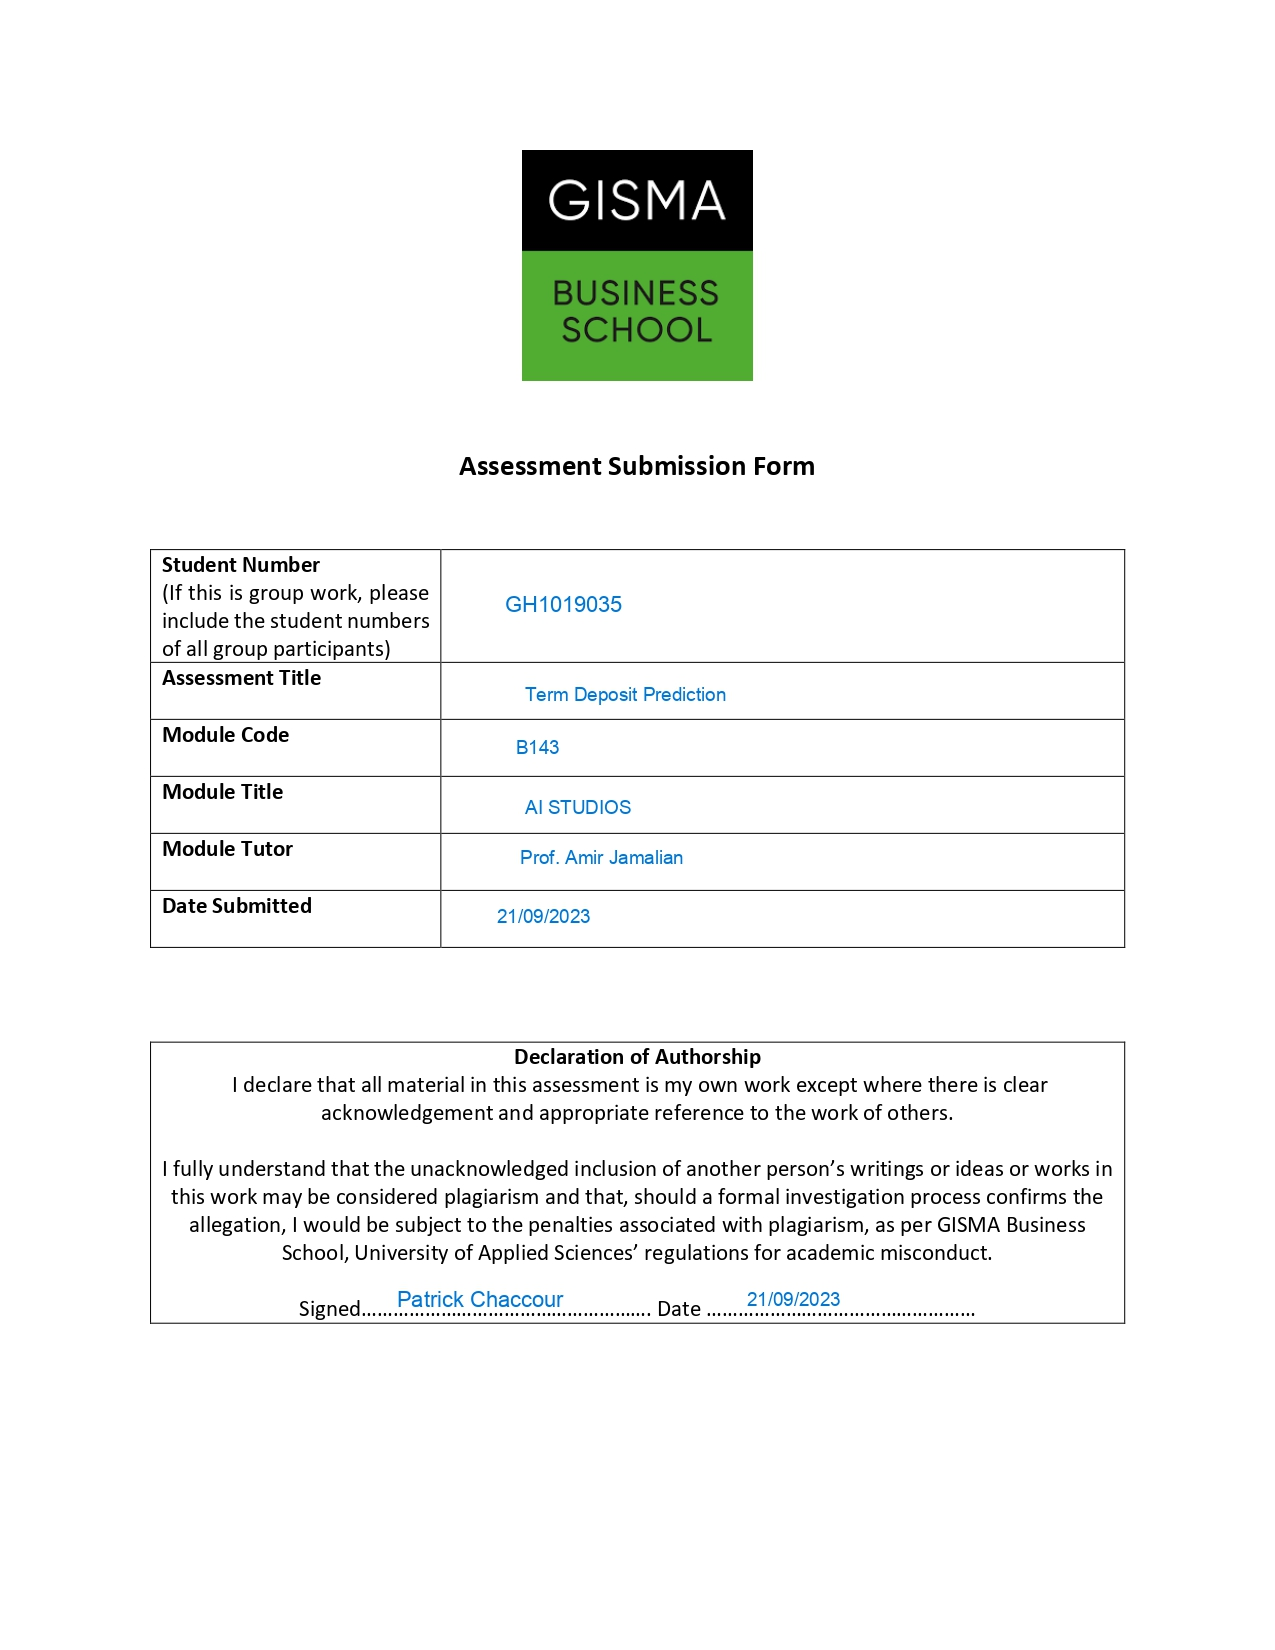

In [30]:
from IPython.display import Image

Image(filename='form.jpg')